In [1]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [2]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import copy

In [3]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable
if find_executable('latex'):
    plt.rc('text', usetex=True)

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [4]:
%reload_ext autoreload
%autoreload 2

In [6]:
import models.rnn as rnns
import models.mlp as mlps
import models.linear as linears
import control.agents as agents
import control.environments as env
import util.eligibility_optim as eligibility

# Setup

## Environment


In [7]:
env_name = 'Taxi-v2'

environment = env.Environment(
    environment=gym.make(env_name), 
    agent=None,
    verbose=True,
    max_steps=200,
    capacity=500,
    representation_method='one_hot_encoding',
)

/anaconda3/envs/rl/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


## Model

In [11]:
model_linear = linears.Linear(
    input_dimension=environment.get_input_dimension(), 
    n_actions=environment.n_actions,
)

model_mlp = mlps.MLP(
    input_dimension=environment.get_input_dimension(), 
    hidden_dimension=100,
    n_hidden_layers=1,
    n_actions=environment.n_actions,
    dropout=0.
)

model_rnn = rnns.RNN(
    input_dimension=environment.get_input_dimension(), 
    hidden_dimension=30,
    n_actions=environment.n_actions,
    dropout=0.,
    truncate=10
)

model_attentive_rnn = rnns.AttentiveRNN(
    input_dimension=environment.get_input_dimension(),
    hidden_dimension=20,
    key_dimension=10,
    n_actions=environment.n_actions,
    dropout=0.,
    horizon=-1,
    truncate=20
)

## Agent

In [12]:
model = model_rnn

agent = agents.DQNAgent(
    model=model,
    optimiser=eligibility.EligibilitySGD(model.parameters(), lr=3e-5, gamma=0.99, lambd=0.9), 
    gamma=.99, 
    temperature=3,
    algorithm='qlearning',
    n_actions=environment.n_actions,
    terminal_state=environment.max_obs,
    use_eligibility=True,
)

environment.agent = agent

Load an agent:

In [12]:
model.load_state_dict(torch.load('../saved/taxi/mlp/state_dict_saved.pth'))
agent.commit()
print(environment.agent.q(environment.state_representation(479)))

[-107.571175 -106.99925  -105.088844 -107.885025 -115.8059   -113.98003 ]


# Experiment

## Training

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 1/100


100%|###############################################################| 10/10 [00:10<00:00,  1.38s/it]


>> Training return : -770.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 43.69
Epoch 2/100


100%|###############################################################| 10/10 [00:15<00:00,  1.62s/it]


>> Training return : -760.19


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.50, steps : 200.00
>> Training loss : 34.65
Epoch 3/100


100%|###############################################################| 10/10 [00:21<00:00,  2.36s/it]


>> Training return : -764.11


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.50, steps : 200.00
>> Training loss : 32.02
Epoch 4/100


100%|###############################################################| 10/10 [00:28<00:00,  3.05s/it]


>> Training return : -773.43


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 30.75
Epoch 5/100


100%|###############################################################| 10/10 [00:31<00:00,  2.83s/it]


>> Training return : -774.41


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 33.98
Epoch 6/100


100%|###############################################################| 10/10 [00:22<00:00,  2.22s/it]


>> Training return : -774.31


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 30.93
Epoch 7/100


100%|###############################################################| 10/10 [00:21<00:00,  2.10s/it]


>> Training return : -757.29


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 30.83
Epoch 8/100


100%|###############################################################| 10/10 [00:21<00:00,  2.10s/it]


>> Training return : -762.11


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 31.40
Epoch 9/100


100%|###############################################################| 10/10 [00:21<00:00,  2.13s/it]


>> Training return : -764.79


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 30.55
Epoch 10/100


100%|###############################################################| 10/10 [00:21<00:00,  2.14s/it]


>> Training return : -753.71
>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 30.72


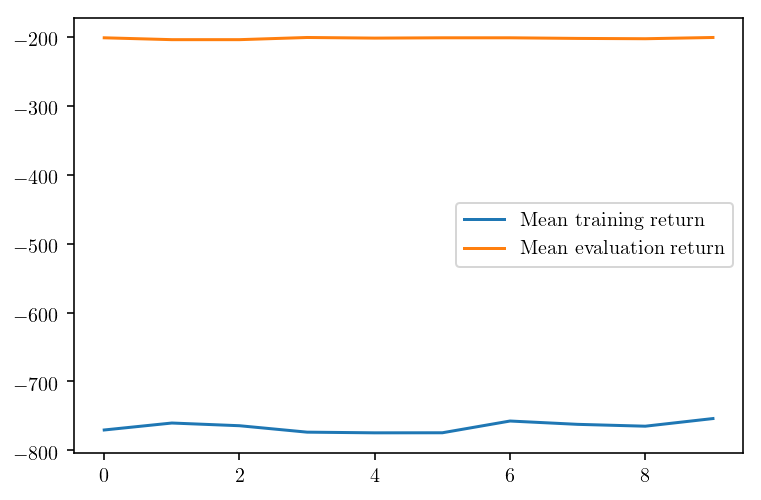

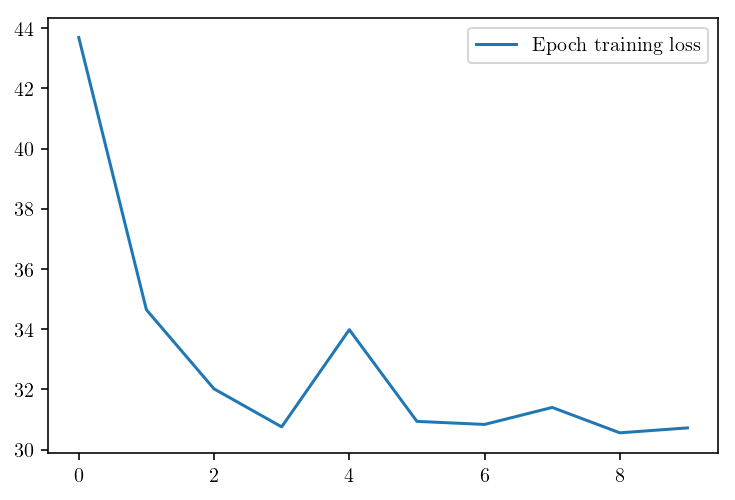

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 11/100


100%|###############################################################| 10/10 [00:34<00:00,  3.56s/it]


>> Training return : -766.08


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 34.88
Epoch 12/100


100%|###############################################################| 10/10 [00:29<00:00,  2.62s/it]


>> Training return : -775.24


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 35.09
Epoch 13/100


100%|###############################################################| 10/10 [00:24<00:00,  2.49s/it]


>> Training return : -757.95


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.50, steps : 200.00
>> Training loss : 35.58
Epoch 14/100


100%|###############################################################| 10/10 [00:24<00:00,  2.47s/it]


>> Training return : -769.60


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 34.51
Epoch 15/100


100%|###############################################################| 10/10 [00:24<00:00,  2.48s/it]


>> Training return : -772.17


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 33.82
Epoch 16/100


100%|###############################################################| 10/10 [00:24<00:00,  2.47s/it]


>> Training return : -782.95


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 34.04
Epoch 17/100


100%|###############################################################| 10/10 [00:47<00:00,  5.89s/it]


>> Training return : -764.76


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 33.70
Epoch 18/100


100%|###############################################################| 10/10 [00:25<00:00,  2.55s/it]


>> Training return : -765.65


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 31.45
Epoch 19/100


100%|###############################################################| 10/10 [00:25<00:00,  2.55s/it]


>> Training return : -767.12


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 31.89
Epoch 20/100


100%|###############################################################| 10/10 [00:25<00:00,  2.56s/it]


>> Training return : -755.22
>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 33.03


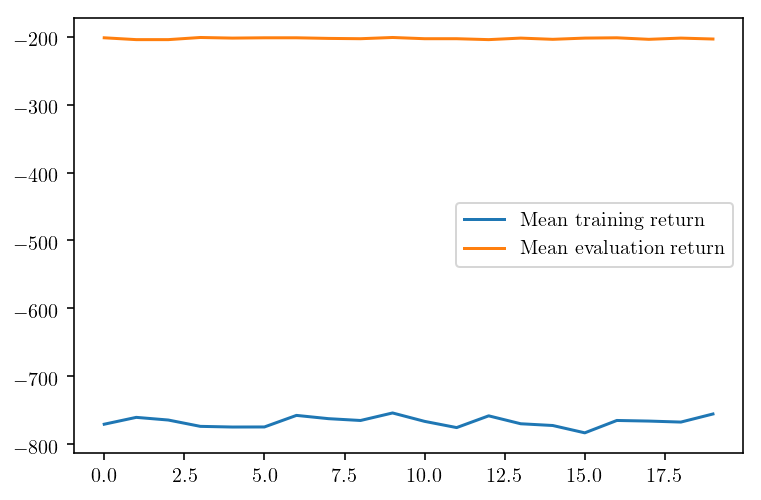

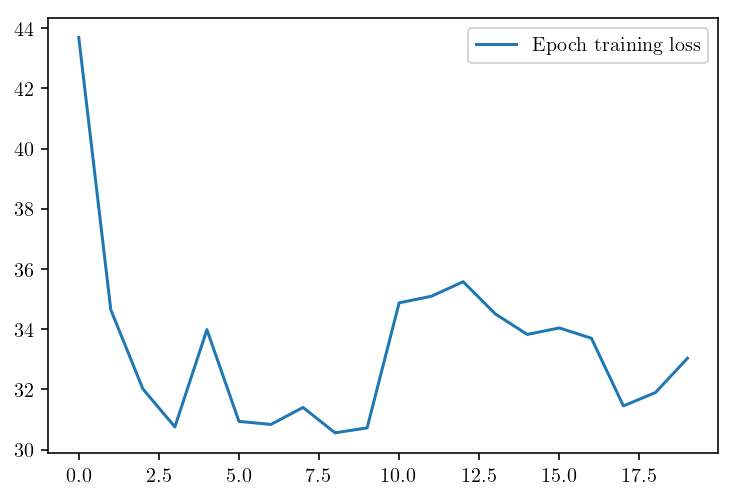

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 21/100


100%|###############################################################| 10/10 [00:25<00:00,  2.55s/it]


>> Training return : -756.80


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 32.13
Epoch 22/100


100%|###############################################################| 10/10 [00:25<00:00,  2.56s/it]


>> Training return : -792.45


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 33.10
Epoch 23/100


100%|###############################################################| 10/10 [00:41<00:00,  4.18s/it]


>> Training return : -769.02


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 31.10
Epoch 24/100


100%|###############################################################| 10/10 [00:41<00:00,  4.19s/it]


>> Training return : -793.00


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 34.97
Epoch 25/100


100%|###############################################################| 10/10 [00:32<00:00,  2.52s/it]


>> Training return : -769.05


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 33.76
Epoch 26/100


100%|###############################################################| 10/10 [00:19<00:00,  1.94s/it]


>> Training return : -773.22


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 29.85
Epoch 27/100


100%|###############################################################| 10/10 [00:19<00:00,  1.97s/it]


>> Training return : -774.37


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 31.04
Epoch 28/100


100%|###############################################################| 10/10 [00:20<00:00,  1.99s/it]


>> Training return : -759.10


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.50, steps : 200.00
>> Training loss : 32.74
Epoch 29/100


100%|###############################################################| 10/10 [00:20<00:00,  2.04s/it]


>> Training return : -770.62


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 35.42
Epoch 30/100


100%|###############################################################| 10/10 [00:24<00:00,  3.12s/it]


>> Training return : -786.21
>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 36.33


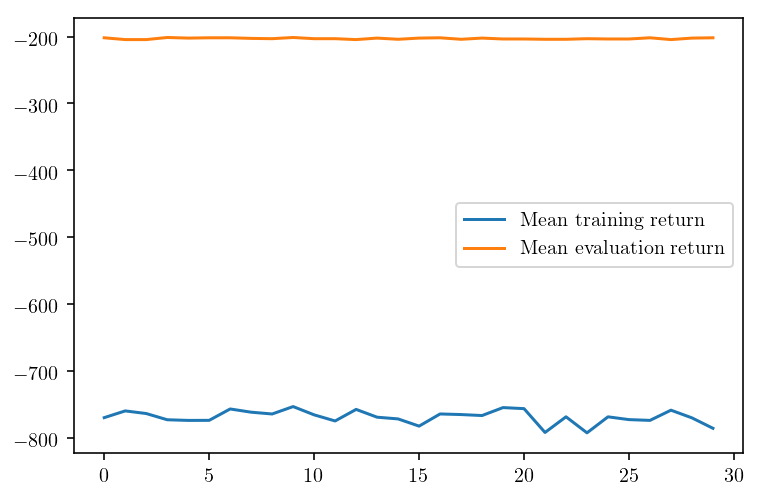

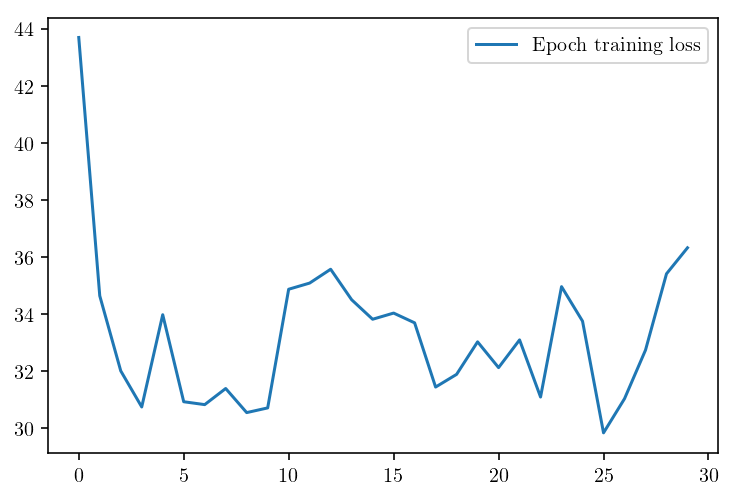

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 31/100


100%|###############################################################| 10/10 [00:40<00:00,  4.08s/it]


>> Training return : -757.25


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 32.40
Epoch 32/100


100%|###############################################################| 10/10 [00:42<00:00,  4.28s/it]


>> Training return : -770.98


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 31.04
Epoch 33/100


100%|###############################################################| 10/10 [00:39<00:00,  3.68s/it]


>> Training return : -761.04


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 32.43
Epoch 34/100


100%|###############################################################| 10/10 [00:35<00:00,  3.59s/it]


>> Training return : -755.88


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 35.01
Epoch 35/100


100%|###############################################################| 10/10 [00:35<00:00,  3.58s/it]


>> Training return : -748.40


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 36.61
Epoch 36/100


100%|###############################################################| 10/10 [00:36<00:00,  3.60s/it]


>> Training return : -778.86


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 37.22
Epoch 37/100


100%|###############################################################| 10/10 [00:36<00:00,  3.60s/it]


>> Training return : -778.18


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 39.04
Epoch 38/100


100%|###############################################################| 10/10 [00:35<00:00,  3.60s/it]


>> Training return : -779.72


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 39.77
Epoch 39/100


100%|###############################################################| 10/10 [00:36<00:00,  3.62s/it]


>> Training return : -765.68


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 38.40
Epoch 40/100


100%|###############################################################| 10/10 [00:36<00:00,  3.62s/it]


>> Training return : -778.25
>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 38.20


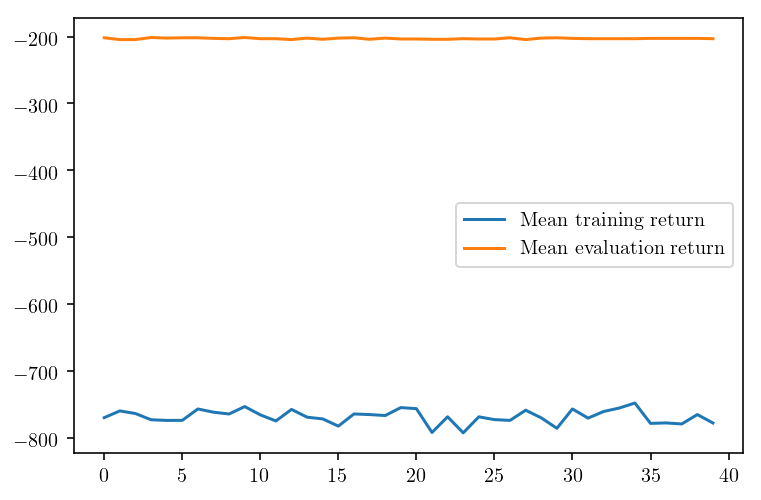

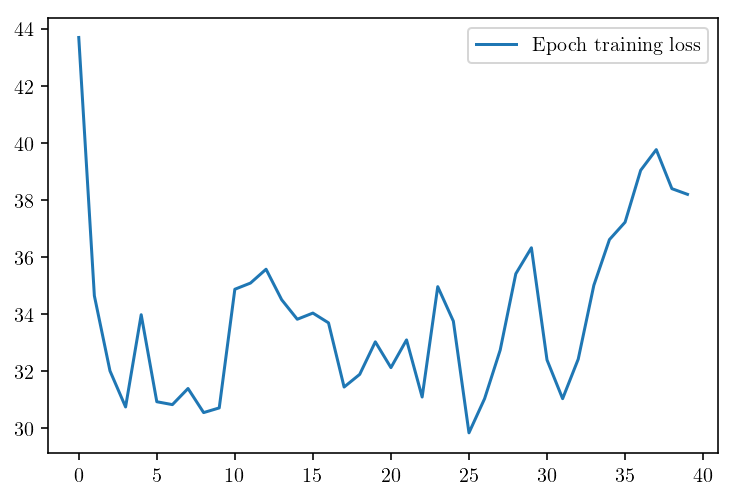

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 41/100


100%|###############################################################| 10/10 [00:36<00:00,  3.60s/it]


>> Training return : -767.82


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 38.77
Epoch 42/100


100%|###############################################################| 10/10 [00:22<00:00,  2.26s/it]


>> Training return : -769.25


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 36.92
Epoch 43/100


100%|###############################################################| 10/10 [00:22<00:00,  2.24s/it]


>> Training return : -752.91


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 36.02
Epoch 44/100


100%|###############################################################| 10/10 [00:22<00:00,  2.26s/it]


>> Training return : -776.99


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 35.47
Epoch 45/100


100%|###############################################################| 10/10 [00:22<00:00,  2.28s/it]


>> Training return : -772.19


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 36.18
Epoch 46/100


100%|###############################################################| 10/10 [00:15<00:00,  1.17s/it]


>> Training return : -759.22


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 34.19
Epoch 47/100


100%|###############################################################| 10/10 [00:09<00:00,  1.01it/s]


>> Training return : -788.84


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -204.05, steps : 200.00
>> Training loss : 34.70
Epoch 48/100


100%|###############################################################| 10/10 [00:09<00:00,  1.02it/s]


>> Training return : -768.56


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 36.05
Epoch 49/100


100%|###############################################################| 10/10 [00:09<00:00,  1.02it/s]


>> Training return : -759.27


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 36.84
Epoch 50/100


100%|###############################################################| 10/10 [00:09<00:00,  1.02it/s]


>> Training return : -774.47
>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 36.66


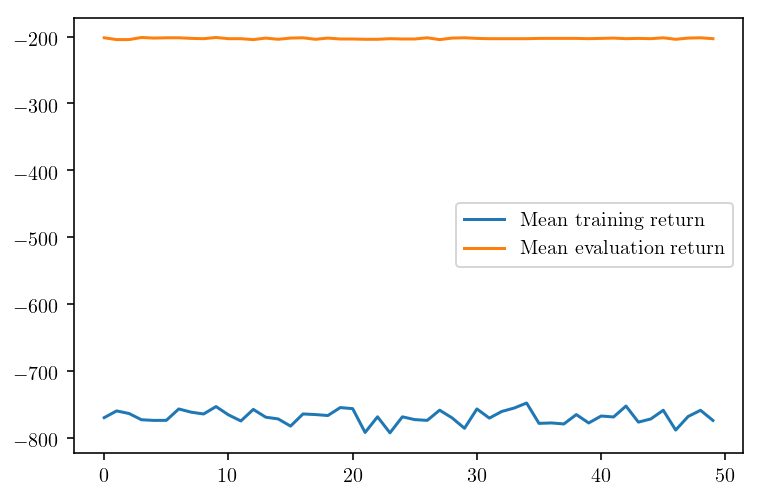

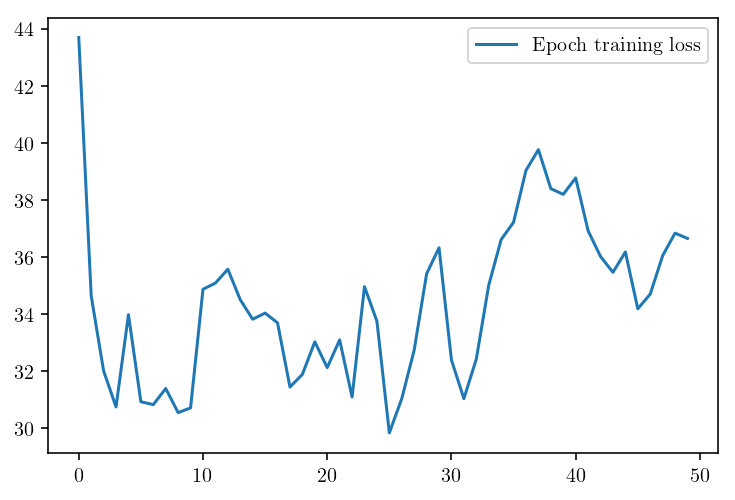

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 51/100


100%|###############################################################| 10/10 [00:33<00:00,  5.13s/it]


>> Training return : -777.33


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 33.97
Epoch 52/100


100%|###############################################################| 10/10 [01:04<00:00,  6.48s/it]


>> Training return : -758.49


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 32.89
Epoch 53/100


100%|###############################################################| 10/10 [01:02<00:00,  5.57s/it]


>> Training return : -767.60


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 34.09
Epoch 54/100


100%|###############################################################| 10/10 [00:20<00:00,  2.09s/it]


>> Training return : -772.32


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 33.64
Epoch 55/100


100%|###############################################################| 10/10 [00:19<00:00,  2.04s/it]


>> Training return : -754.28


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 34.34
Epoch 56/100


100%|###############################################################| 10/10 [00:20<00:00,  2.03s/it]


>> Training return : -781.70


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 33.10
Epoch 57/100


100%|###############################################################| 10/10 [00:20<00:00,  2.04s/it]


>> Training return : -758.64


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 31.82
Epoch 58/100


100%|###############################################################| 10/10 [00:24<00:00,  3.24s/it]


>> Training return : -772.49


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 32.60
Epoch 59/100


100%|###############################################################| 10/10 [00:57<00:00,  5.80s/it]


>> Training return : -789.05


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.60, steps : 200.00
>> Training loss : 35.90
Epoch 60/100


100%|###############################################################| 10/10 [00:57<00:00,  5.87s/it]


>> Training return : -780.31
>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 34.69


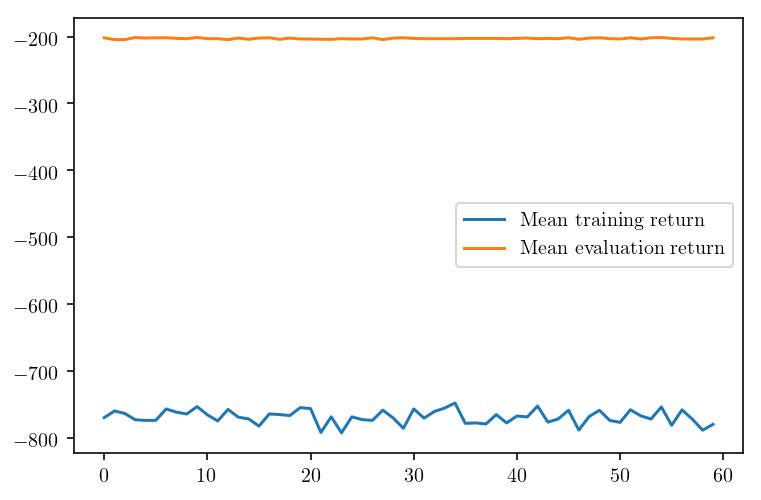

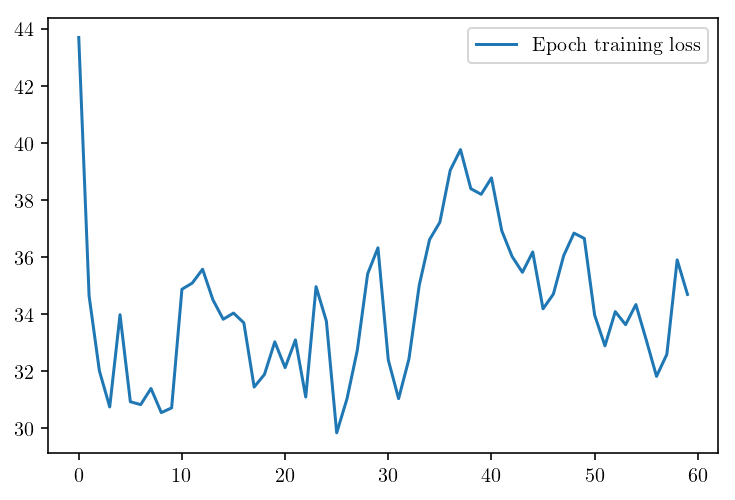

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 61/100


100%|###############################################################| 10/10 [00:56<00:00,  5.53s/it]


>> Training return : -778.04


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 32.97
Epoch 62/100


100%|###############################################################| 10/10 [00:43<00:00,  4.25s/it]


>> Training return : -783.52


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.70, steps : 200.00
>> Training loss : 34.31
Epoch 63/100


100%|###############################################################| 10/10 [00:41<00:00,  4.22s/it]


>> Training return : -775.15


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 34.26
Epoch 64/100


100%|###############################################################| 10/10 [00:43<00:00,  4.36s/it]


>> Training return : -779.01


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 33.92
Epoch 65/100


100%|###############################################################| 10/10 [00:43<00:00,  4.44s/it]


>> Training return : -760.07


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 33.42
Epoch 66/100


100%|###############################################################| 10/10 [00:41<00:00,  4.19s/it]


>> Training return : -762.50


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -203.15, steps : 200.00
>> Training loss : 34.43
Epoch 67/100


100%|###############################################################| 10/10 [00:45<00:00,  4.54s/it]


>> Training return : -770.55


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.35, steps : 200.00
>> Training loss : 33.17
Epoch 68/100


100%|###############################################################| 10/10 [00:46<00:00,  4.60s/it]


>> Training return : -785.25


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -202.25, steps : 200.00
>> Training loss : 34.27
Epoch 69/100


100%|###############################################################| 10/10 [00:43<00:00,  4.09s/it]


>> Training return : -763.69


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

>> Evaluation return : -201.80, steps : 200.00
>> Training loss : 34.65
Epoch 70/100


100%|###############################################################| 10/10 [00:37<00:00,  3.81s/it]


>> Training return : -780.63
>> Evaluation return : -204.50, steps : 200.00
>> Training loss : 33.48


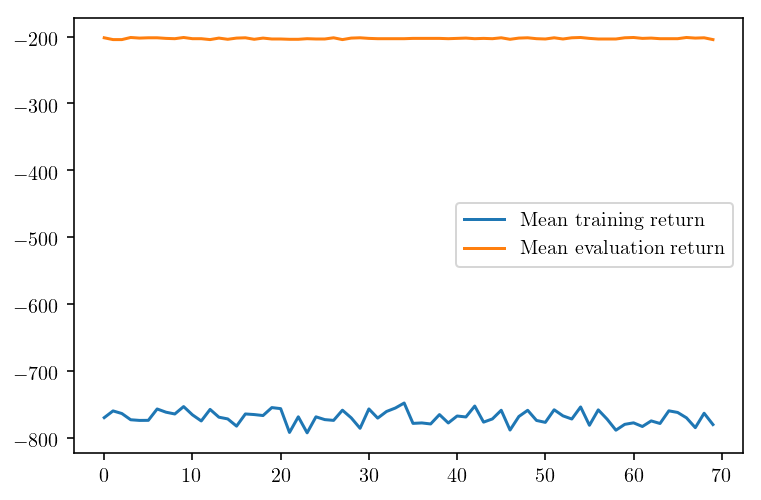

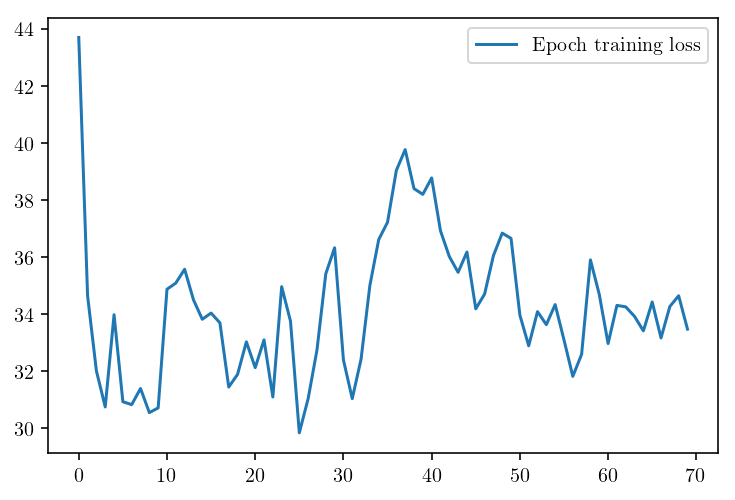

  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Epoch 71/100


 70%|############################################8                   | 7/10 [00:29<00:12,  4.17s/it]

In [ ]:
training, evaluation = environment.run(
    epochs=100,
    segments=10,
    episodes=10,
    wall_time=2,
    num_evaluation=20,
    batch_size=100,
    save_directory='../saved/final/rnn_eligibility',
    log_directory='final_taxi_rnn_eligibility',
    temp_decay = 1.,
    display_return_curve=True,
)

## Testing

In [14]:
environment.exploration_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

State: 246
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 226
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 126
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
State: 126
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 226
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 206
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 206
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 106
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
State: 106
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
State: 346
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 326
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
State: 326
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 426
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 426
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
State: 426
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 426
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 326
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
State: 326
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | :

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
State: 486
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 466
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 366
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 366
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 366
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 366
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 466
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 466
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 366
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |


(-452.0, 200)

In [24]:
environment.evaluation_episode(render=True)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

State: 294
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
State: 294
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 394
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
State: 494
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 474
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
State: 478
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
State: 378
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
State: 278
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
State: 258
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : 

(8.0, 13)

## Save

In [41]:
environment.agent.save('../saved/taxi/mlp')